In [5]:
import folium
from folium import plugins

# 读取GeoJSON数据
geojson_data = 'testdata.geojson'

# 定义颜色区间和图例标签
colors = ['green', 'yellow', 'orange', 'red']
legend_labels = ['Low', 'Moderate', 'High', 'Very High']

# 创建地图对象
m = folium.Map(location=[37, 113], zoom_start=10)

# 创建Choropleth图层，将面数据着色
folium.Choropleth(
    geo_data=geojson_data,
    fill_color='YlGn',
    fill_opacity=0.2,
    line_opacity=1,
    key_on='feature.properties.vegetable',
    data=None,
    legend_name='Vegetation',
    bins=[0, 25, 50, 75, 400],  # 根据数据分成的区间
    colors=colors,
).add_to(m)

# 添加图例
folium.LayerControl(collapsed=False).add_to(m)

# 添加指北针
minimap = plugins.MiniMap()
m.add_child(minimap)

# 添加比例尺
# folium.plugins.ScaleControl().add_to(m)
# 显示地图
m

In [6]:
import pandas
import requests

state_geo = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()
state_data = pandas.read_csv(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_unemployment_oct_2012.csv"
)

m = folium.Map(location=[48, -102], 
               zoom_start=3, 
               tiles='Stamen Terrain',
               zoom_control=False,
               control_scale=True)
# blank_tile_layer = folium.TileLayer(tiles='', attr='')

# 将空白底图图层添加到地图上
# blank_tile_layer.add_to(m)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
    bins=[0, 3, 6, 9, 12]
).add_to(m)

# folium.LayerControl().add_to(m)
m

<Axes: >

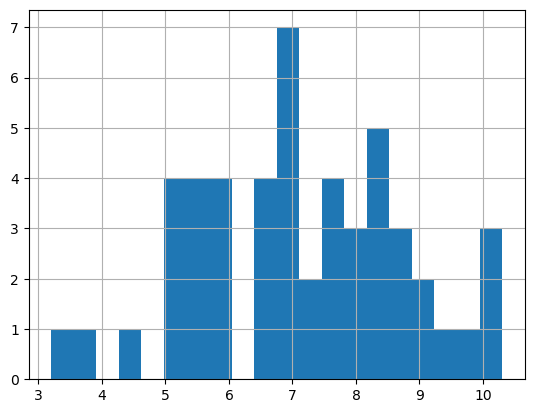

In [7]:
state_data["Unemployment"].hist(bins=20)


In [19]:
df = geopandas.read_file("/Users/zowcool/Desktop/test.geojson")
df

,adhz,age_1,age_2,age_3,age_4,age_5,born_chi,born_else,born_hk,dh,...,wp_o,wp_p,wp_q,wp_r,wp_s,wp_se,wp_t,writechi_ablepctn,writeeng_ablepctn,geometry
0,2.6,6551,7454,18751,19711,9805,18100,7578,36594,22432,...,1254,4476,5724,5505,4340,2518,137,83.4,73.9,"MULTIPOLYGON (((114.11631 22.27754, 114.11631 ..."
1,2.5,4830,6483,15658,16988,9124,17783,5861,29439,20374,...,1057,3106,4987,4356,3341,2447,117,86.1,71.1,"POLYGON ((114.13172 22.28924, 114.13172 22.289..."
2,2.2,2220,3039,10513,9865,5755,8696,6645,16051,13783,...,887,2709,2884,2238,2253,1622,54,75.7,74.7,"POLYGON ((114.14357 22.28429, 114.14357 22.284..."
3,2.7,978,1896,3683,4330,3206,5061,1198,7834,4823,...,347,803,1296,908,814,613,56,83.6,65.2,"POLYGON ((114.13031 22.28645, 114.13063 22.286..."
4,2.2,1717,1674,7163,6673,3692,5342,4789,10788,9293,...,469,1620,1989,1415,1690,1062,24,75.7,76.1,"POLYGON ((114.15060 22.28770, 114.15067 22.287..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,2.8,1875,2109,6127,6129,4716,3602,1065,16289,7275,...,86,517,1575,1642,924,773,332,77.9,54.8,"MULTIPOLYGON (((114.02304 22.21251, 114.02305 ..."
150,2.9,10069,10589,28083,26407,11255,26821,14188,45394,29044,...,1767,2716,5881,4659,4178,2937,129,82.7,71.3,"MULTIPOLYGON (((113.98028 22.33515, 113.98025 ..."
151,2.4,1227,1061,4071,4113,2411,2491,2150,8242,4880,...,247,231,643,876,894,815,35,71.6,62.0,"MULTIPOLYGON (((114.04842 22.28349, 114.04842 ..."
152,2.6,3374,956,7103,6150,2825,2603,9568,8237,7545,...,686,1471,1471,1577,2572,802,9,47.9,92.5,"MULTIPOLYGON (((114.07390 22.28399, 114.07390 ..."


In [15]:
df = geopandas.read_file('/Users/zowcool/Downloads/Currentweatherreport_GEOJSON/current_weather_report_hong_kong.json')
df

,location_en,location_tc,location_sc,url,fid,geometry
0,Hong Kong,香港,香港,https://data.weather.gov.hk/weatherAPI/hko_dat...,1,"LINESTRING (113.99520 22.51030, 114.00030 22.5..."


In [14]:
world.head(20)

,ID,NAME,CODE,fruit,vegetable,corn,oil,herb,total_food,均值,...,GDP,doctor,fertilizer,soil,elevation,river,road,birth,geometry,category
0,1,松沟,02010,0.0,9.0,124.0,13.03,443.0,140.39050,95.1716,...,3.7003,1.0,20.0,20,1400.00,6,6,14,"MULTIPOLYGON (((113.73731 37.09375, 113.74315 ...",0
1,2,夫子岭,03022,0.0,20.0,161.0,2.74,155.0,500.31700,95.1716,...,5.8980,1.0,46.0,20,1300.00,4,4,31,"MULTIPOLYGON (((113.75898 37.09599, 113.75844 ...",0
2,3,大发沟,08039,0.0,7.0,130.0,1.54,283.0,147.80250,95.1716,...,4.0223,1.0,37.0,20,1300.00,2,4,24,"MULTIPOLYGON (((113.76248 37.11284, 113.76247 ...",0
3,4,后营,07006,0.0,5.0,42.0,0.83,119.0,59.40500,95.1716,...,3.4298,1.0,80.0,20,1276.92,4,4,23,"MULTIPOLYGON (((113.74071 37.11888, 113.74364 ...",0
4,5,前营,03051,0.0,21.0,26.0,12.54,170.0,43.10300,95.1716,...,2.2581,1.0,23.0,20,1222.04,4,6,33,"MULTIPOLYGON (((113.73260 37.12031, 113.72406 ...",0
5,6,小拐,07023,0.0,6.0,41.0,0.99,343.0,54.11300,95.1716,...,2.3775,1.0,24.0,20,1200.00,6,4,14,"MULTIPOLYGON (((113.70745 37.12668, 113.70086 ...",0
6,7,乔庄,03019,3.0,79.0,29.0,2.70,58.0,52.07000,95.1716,...,2.6787,1.0,74.0,5,1100.00,8,2,80,"MULTIPOLYGON (((113.68206 37.12811, 113.67511 ...",2
7,8,走马槽,08029,0.0,25.0,58.0,0.64,121.0,82.91500,95.1716,...,4.3000,1.0,22.0,7,1400.00,2,2,13,"MULTIPOLYGON (((113.76720 37.14545, 113.76709 ...",0
8,9,雪场,08031,0.0,35.0,333.0,4.70,419.0,493.72500,95.1716,...,3.9950,1.0,12.0,7,1400.00,2,2,3,"MULTIPOLYGON (((113.73643 37.13917, 113.73473 ...",1
9,10,北岭头,02016,2.0,43.0,56.0,7.20,163.0,64.24150,95.1716,...,3.1832,1.0,45.0,7,1400.00,2,2,33,"MULTIPOLYGON (((113.76299 37.14745, 113.74598 ...",1


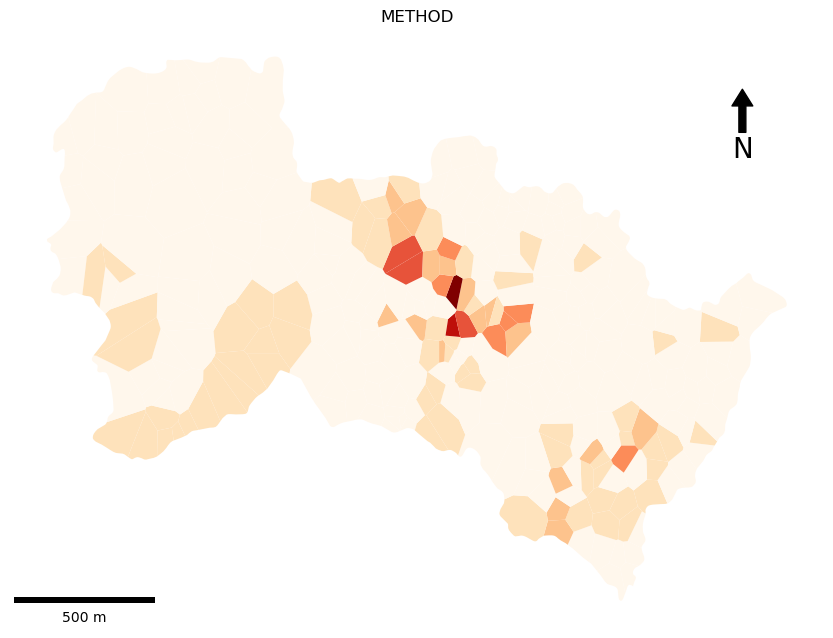

In [13]:
import geopandas
import matplotlib.pyplot as plt
import mapclassify
from matplotlib_scalebar.scalebar import ScaleBar
world = geopandas.read_file('testdata.geojson')
# ei = mapclassify.EqualInterval(world['vegetable'], k=5)
ei = mapclassify.HeadTailBreaks(world['vegetable'])
world['category'] = ei.yb
ax = world.plot(column='category', 
                legend=False, 
                # legend_kwds={'loc': 'lower right'}, 
                cmap='OrRd', 
                figsize=(10.5, 10))
ax.add_artist(ScaleBar(3, units="km", location="lower left"))
ax.set_xticks([], None)
ax.set_yticks([], None)
plt.title("METHOD")
ax.set_axis_off()
x, y, arrow_length = 0.9, 0.9, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
plt.show()

In [24]:
world.head()

,ID,NAME,CODE,fruit,vegetable,corn,oil,herb,total_food,均值,...,NTDS_rate,GDP,doctor,fertilizer,soil,elevation,river,road,birth,geometry
0,1,松沟,02010,0.0,9.0,124.0,13.03,443.0,140.3905,95.1716,...,0.0000,3.7003,1.0,20.0,20,1400.00,6,6,14,"MULTIPOLYGON (((113.73731 37.09375, 113.74315 ..."
1,2,夫子岭,03022,0.0,20.0,161.0,2.74,155.0,500.3170,95.1716,...,0.0000,5.8980,1.0,46.0,20,1300.00,4,4,31,"MULTIPOLYGON (((113.75898 37.09599, 113.75844 ..."
2,3,大发沟,08039,0.0,7.0,130.0,1.54,283.0,147.8025,95.1716,...,0.0000,4.0223,1.0,37.0,20,1300.00,2,4,24,"MULTIPOLYGON (((113.76248 37.11284, 113.76247 ..."
3,4,后营,07006,0.0,5.0,42.0,0.83,119.0,59.4050,95.1716,...,0.1304,3.4298,1.0,80.0,20,1276.92,4,4,23,"MULTIPOLYGON (((113.74071 37.11888, 113.74364 ..."
4,5,前营,03051,0.0,21.0,26.0,12.54,170.0,43.1030,95.1716,...,0.0000,2.2581,1.0,23.0,20,1222.04,4,6,33,"MULTIPOLYGON (((113.73260 37.12031, 113.72406 ..."


<Axes: >

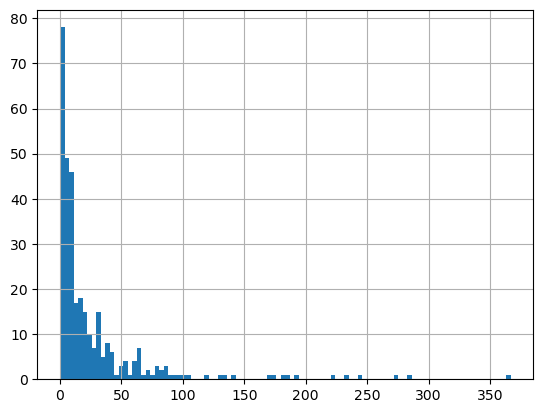

In [58]:
world.vegetable.hist(bins=100)

In [24]:
world.describe()

,ID,fruit,vegetable,corn,oil,herb,total_food,均值,方差,NTDS_rate,GDP,doctor,fertilizer,soil,elevation,river,road,birth
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,163.500000,1.484663,27.274509,93.950920,4.105031,208.561350,142.326396,33.524713,233.492742,0.023367,9.070910,0.711656,29.865031,10.975460,1393.018129,3.650307,3.447853,24.141104
std,94.252321,10.550891,46.788476,99.885214,7.913370,152.995729,139.298511,47.172999,361.488697,0.058355,36.883058,1.327688,30.434902,6.833358,139.596238,2.361313,2.114138,28.672448
min,1.000000,0.000000,0.000000,7.000000,0.000000,7.000000,10.453333,0.000000,0.000000,0.000000,0.472100,0.000000,1.000000,3.000000,0.000000,0.000000,2.000000,0.000000
25%,82.250000,0.000000,4.000000,34.000000,0.660000,113.250000,53.762500,0.000000,0.000000,0.000000,3.073175,0.000000,11.000000,7.000000,1300.000000,2.000000,2.000000,7.000000
50%,163.500000,0.000000,10.000000,63.000000,1.600000,172.000000,94.020417,0.000000,0.000000,0.000000,4.989900,1.000000,21.000000,7.000000,1400.000000,2.000000,2.000000,14.000000
75%,244.750000,0.000000,30.000000,109.000000,3.315000,276.750000,173.753875,95.171600,368.928000,0.021700,8.149250,1.000000,37.000000,20.000000,1487.807500,4.000000,4.000000,31.000000
max,326.000000,173.000000,367.000000,674.000000,63.580000,1519.000000,798.472000,109.396000,896.187000,0.500000,634.667000,21.000000,294.000000,27.000000,1700.000000,12.000000,12.000000,181.000000


‘box_plot’, ‘equal_interval’, ‘fisher_jenks’, ‘fisher_jenks_sampled’, ‘headtail_breaks’, ‘jenks_caspall’, ‘jenks_caspall_forced’, ‘jenks_caspall_sampled’, ‘max_p_classifier’, ‘maximum_breaks’, ‘natural_breaks’, ‘quantiles’, ‘percentiles’, ‘std_mean’ or ‘user_defined’)

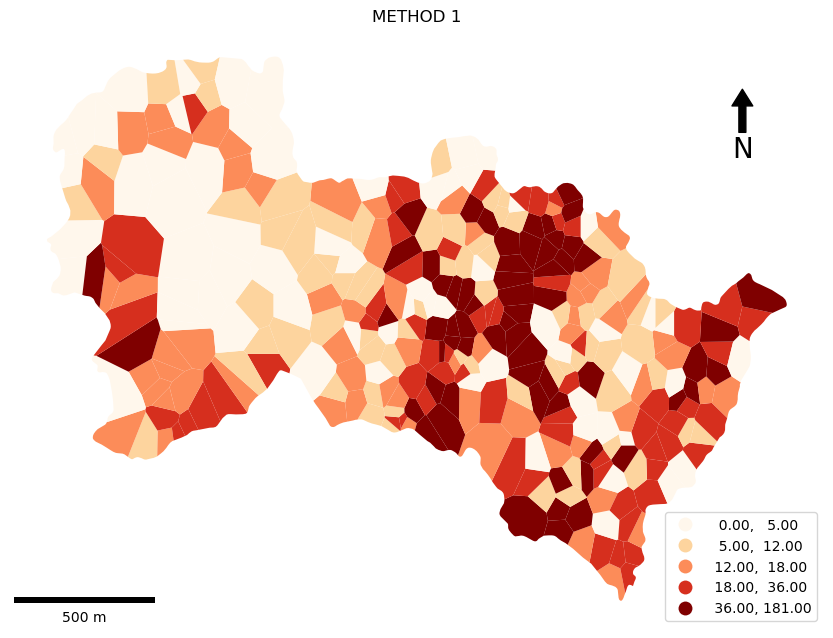

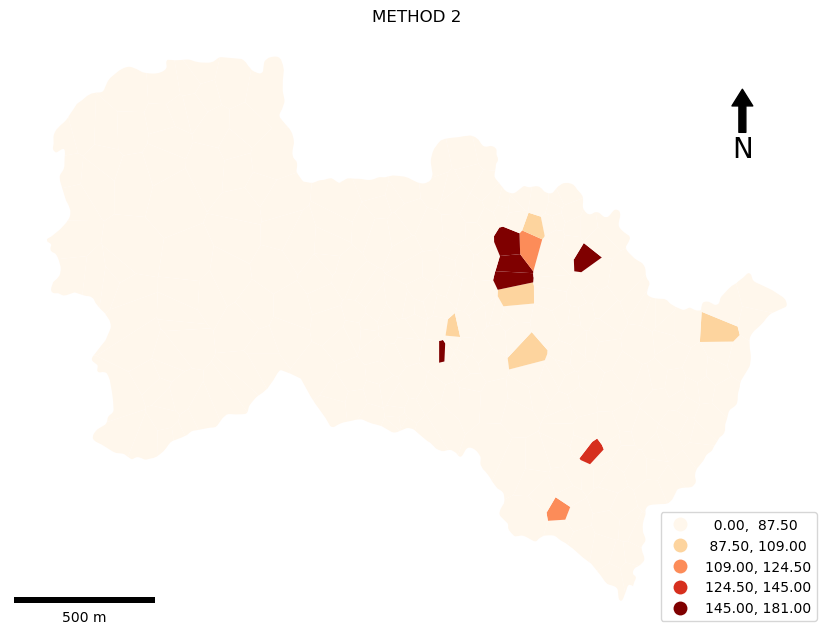

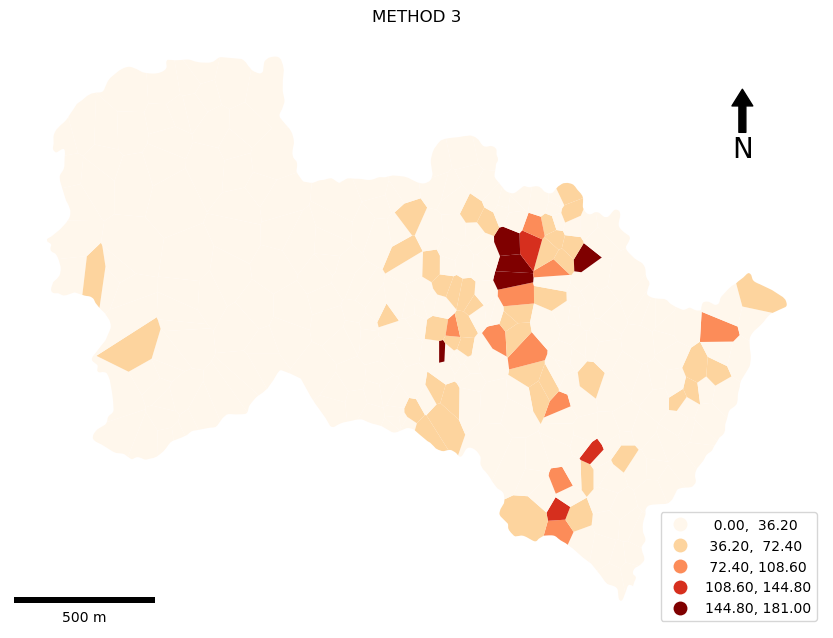

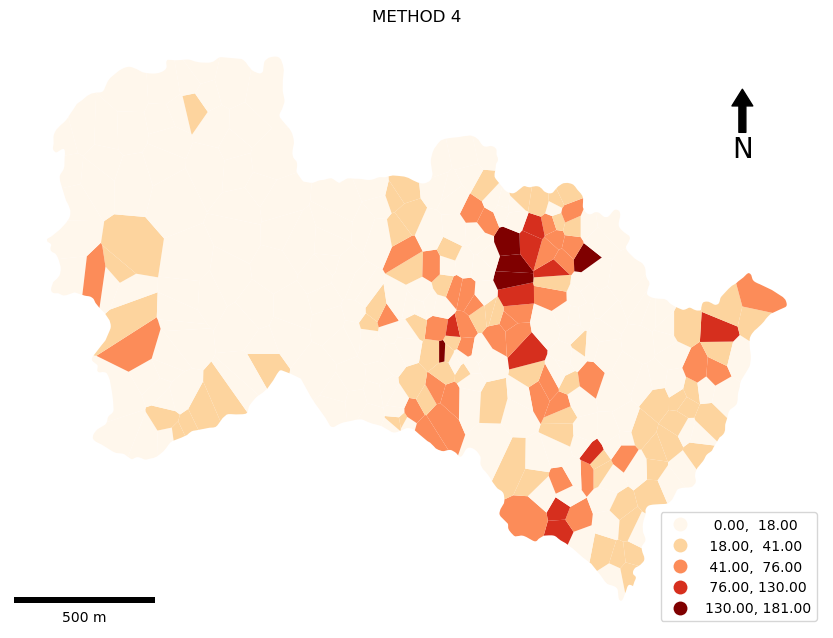

In [57]:
world = geopandas.read_file('testdata.geojson')
classifyMethods = ["quantiles","maximum_breaks", "equal_interval", "natural_breaks"]
def plotMap(df, col, sche, index):
    ax = df.plot(column= col, 
                    legend=True, 
                    legend_kwds={'loc': 'lower right'}, 
                    cmap='OrRd', 
                    scheme=sche,
                    # scheme_kwds={"k": 5},
                    figsize=(10.5, 10))
    ax.add_artist(ScaleBar(3, units="km", location="lower left"))
    ax.set_xticks([], None)
    ax.set_yticks([], None)
    plt.title("METHOD {}".format(i + 1))
    x, y, arrow_length = 0.9, 0.9, 0.1
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
    ax.set_axis_off()
    plt.show()

for i, s in enumerate(classifyMethods):
    plotMap(world, "birth", s, i)

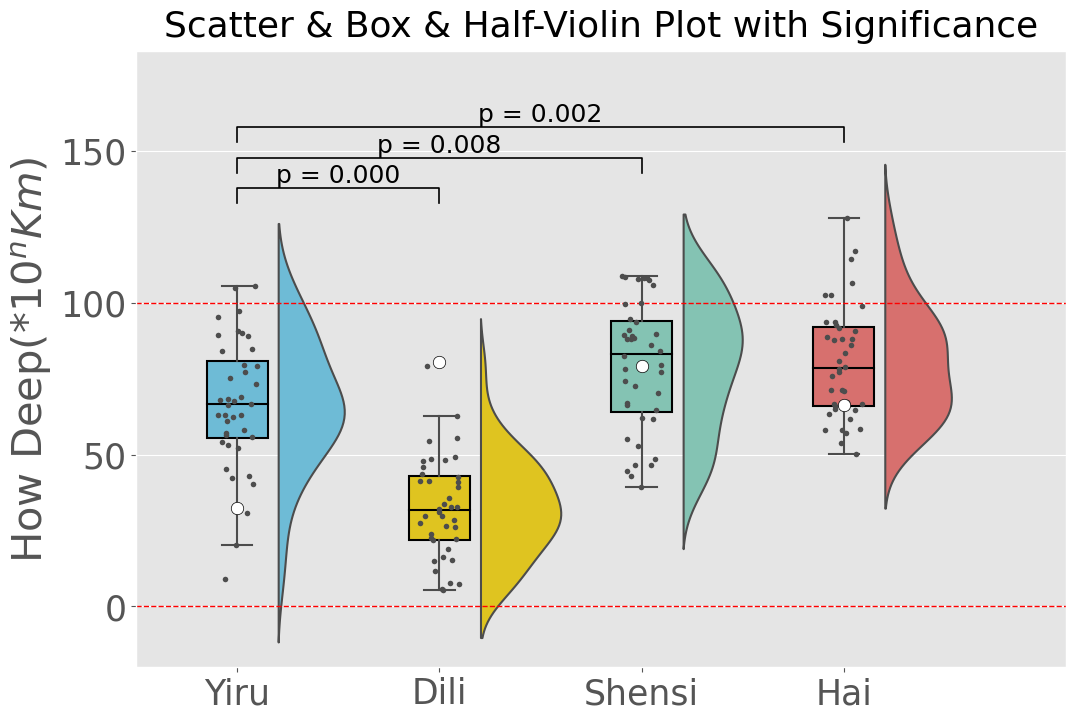

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
#格式
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator

# plt.style.use(['ggplot'])
import warnings
warnings.filterwarnings('ignore') 
linewidth=3
alpha=0.8

font_prop_legend= FontProperties(family='Times New Roman')
fontdict_legend={'family': 'Times New Roman', 'size': 15}
# Set global font size
mpl.rcParams['font.size'] =18
# Set global font size for labels
mpl.rcParams['axes.labelsize'] = 30
# Set global font size for tick labels
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25
mpl.rcParams['legend.fontsize'] = 25
#mpl.rcParams['figure.figsize'] = (20.35,10)# For 公众号
# Reproducing the provided code to create the data and the plot

np.random.seed(0)
n = 40  # number of observations per group
groups = ['Yiru', 'Dili', 'Shensi', 'Hai']

df = pd.DataFrame({
    'group': np.repeat(groups, n),
    'value': (np.random.randn(n * len(groups)) * 20) + 50
})


df.loc[df['group'] == 'Yiru', 'value'] += 10
df.loc[df['group'] == 'Dili', 'value'] -= 10
df.loc[df['group'] == 'Shensi', 'value'] += 20
df.loc[df['group'] == 'Hai', 'value'] += 30

plt.figure(figsize=(12, 8))
palette = ["#5cc3e8","#ffdb00","#79ceb8","#e95f5c"]
violin_parts = sns.violinplot(x='group', y='value', data=df, split=True, inner=None,
                              palette=palette)

shift = 0.2# 平移小提琴

# The code intended to modify the violin patches to keep only the left half
for vp in violin_parts.collections[::1]:  
    for path in vp.get_paths():
        vertices = path.vertices
        #vertices[:, 0] = np.clip(vertices[:, 0], -np.inf, np.median(vertices[:, 0]))
        '''
        意味着在每个小提琴图的 Path 对象中，所有路径顶点的 x 坐标都被“剪切”到无穷小和 x 坐标中值的范围内。
        换句话说，保留路径的左半部分
        因为任何大于中值的 x 坐标都被设置为中值，从而删除了小提琴图的右侧。
        '''
        vertices[:, 0] = np.clip(vertices[:, 0], np.median(vertices[:, 0]), np.inf)#相反,删除左半边

        # Apply the horizontal shift to the right half
        vertices[:, 0] += shift  # Shift to the right

sns.boxplot(x='group', y='value', data=df, width=0.3, fliersize=0, linewidth=1.5,
            boxprops={'edgecolor': 'black'}, palette=palette, showcaps=True, whiskerprops={'linewidth':1.5},
            capprops={'linewidth':1.5}, medianprops={'color':'black'})

'''
Seaborn的boxplot函数默认绘制中位数
但不绘制均值。要在箱形图中添加均值
可以使用pointplot或直接在matplotlib中添加点'''
# Calculate the mean values for each group
mean_values = df.groupby('group')['value'].mean().values

# Add the mean values to the boxplot using plt.scatter
plt.scatter(groups, mean_values, color='white', edgecolor='black',s=80, zorder=5)

sns.stripplot(x='group', y='value', data=df, jitter=True, size=4, color=".3", linewidth=0)

plt.axhline(y=0, linestyle='--', color='red', linewidth=1)
plt.axhline(y=100, linestyle='--', color='red', linewidth=1)

y, h, col = df['value'].max()+5, 5, 'k'

# y 为当前数据值的最大值加上5，这是为了确定在哪个高度上绘制显著性标记。
# h 是每一对比较之间的高度差，用来确保标记不会重叠。
#col 是用来绘制线条和文字的颜色（在这里是黑色）

pairs = [('Yiru', 'Dili'), ('Yiru', 'Shensi'), ('Yiru', 'Hai')]
#创建一个比较对的列表 pairs。这里的意思是将组 A 与组 B、组 A 与组 C、以及组 A与组 D 进行比较。

for i, (group1, group2) in enumerate(pairs):
    group1_values = df[df['group'] == group1]['value']
    group2_values = df[df['group'] == group2]['value']
    _, p_value = ttest_ind(group1_values, group2_values)
    

    if p_value < 0.05:
        x1, x2 = groups.index(group1), groups.index(group2)
        
        plt.plot([x1, x1, x2, x2], [y + (h*i), y + h + (h*i), y + h + (h*i), y + (h*i)], lw=1.2, c=col)
        plt.text((x1+x2)*.5, y+h+(h*i), f'p = {p_value:.3f}', ha='center', va='bottom', color=col)

    y += h

plt.ylim(-20, y+h+30)
# sns.despine()#边框可见性

plt.title('Scatter & Box & Half-Violin Plot with Significance',y=1.01)

plt.xlim(-0.50,4.1)
plt.xlabel('')
plt.ylabel('How Deep($*10^n$$Km$)')
plt.subplots_adjust()
plt.show()